In [1]:
# Data Set Information:
# This dataset is composed of a range of biomedical voice measurements from
# 31 people, 23 with Parkinson's disease (PD). Each column in the table is a
# particular voice measure, and each row corresponds one of 195 voice
# recording from these individuals ("name" column). The main aim of the data
# is to discriminate healthy people from those with PD, according to "status"
# column which is set to 0 for healthy and 1 for PD.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/parkinsons.csv

--2022-04-25 08:33:19--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/parkinsons.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.142.18
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.142.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38273 (37K) [text/csv]
Saving to: ‘parkinsons.csv’

parkinsons.csv      100%[===================>]  37.38K  --.-KB/s    in 0.1s    

2022-04-25 08:33:19 (297 KB/s) - ‘parkinsons.csv’ saved [38273/38273]



In [4]:
df = pd.read_csv('parkinsons.csv')

In [5]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df = df.drop("name",axis=1)

In [8]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


0

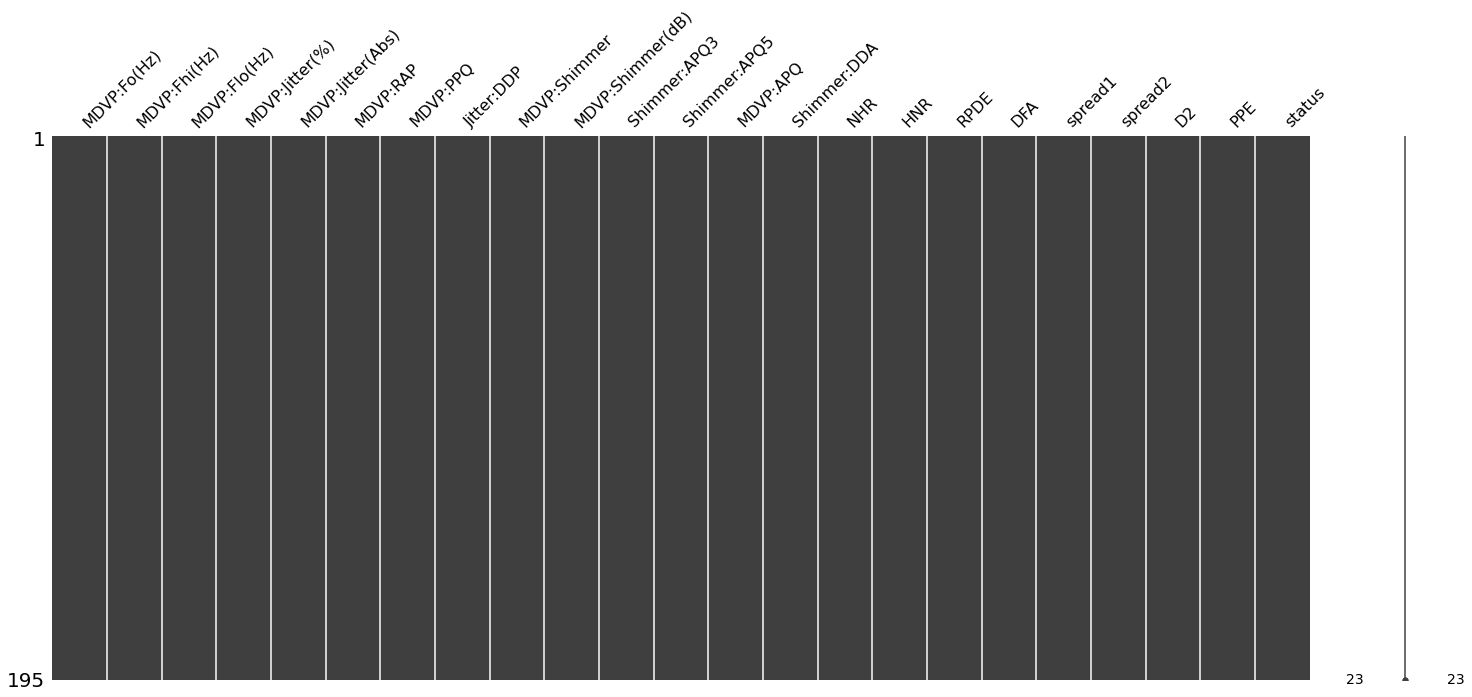

In [9]:
import missingno as msno   # creo il grafico nero con la distribuzione dei valori nulli
msno.matrix(df)
df.isnull().sum().sum()

In [10]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [11]:
# controllo il bilanciamento
from collections import Counter
target = df["status"]
counter = Counter(target)
for k,v in counter.items():
  per = v/len(target)*100
  print("Class=%d, Count=%d, Percentage=%.3f%%" % (k,v, per))

Class=1, Count=147, Percentage=75.385%
Class=0, Count=48, Percentage=24.615%


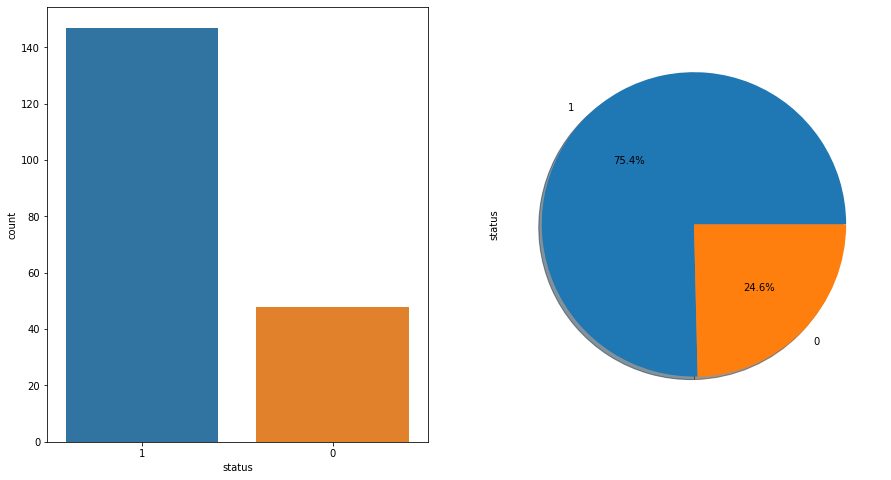

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot(x='status',data=df,order = df['status'].value_counts().index,ax=ax[0])
df["status"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)

In [ ]:
sns.pairplot(df, hue='status', height=2, aspect=1)

Output hidden; open in https://colab.research.google.com to view.

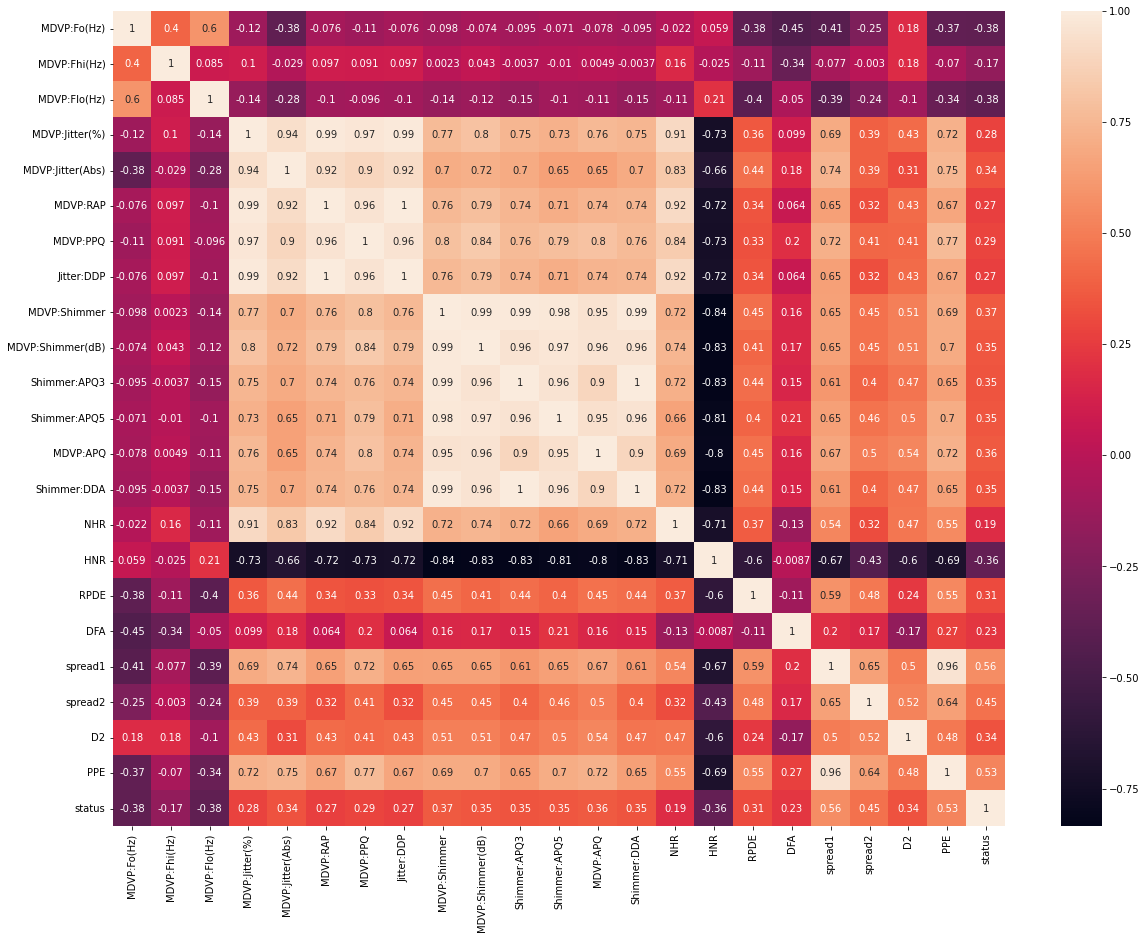

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True);

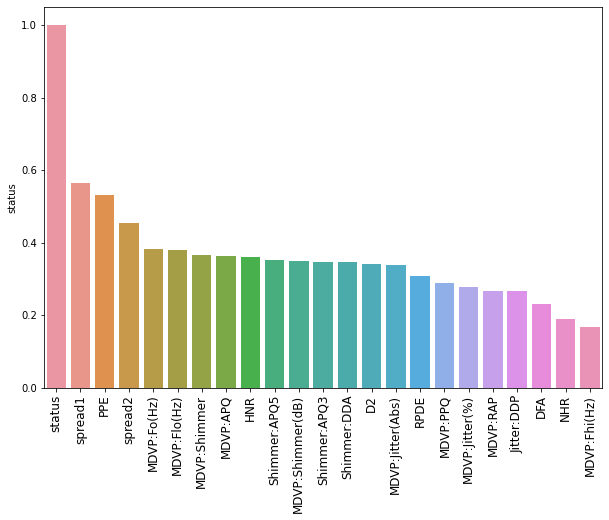

In [ ]:
# grafico di correlazione delle Features bar plot
price_corr = df.corr() ["status"].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [ ]:
# Definisco le Features e il Target 
X = df.drop(['status'], axis=1)
y = df['status']

In [ ]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [ ]:
# Visualizzo la shape del train e test
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


>1, train: 0.859, test: 0.872
>2, train: 0.878, test: 0.846
>3, train: 0.962, test: 0.846
>4, train: 0.981, test: 0.872
>5, train: 1.000, test: 0.872
>6, train: 1.000, test: 0.897
>7, train: 1.000, test: 0.897
>8, train: 1.000, test: 0.897
>9, train: 1.000, test: 0.897


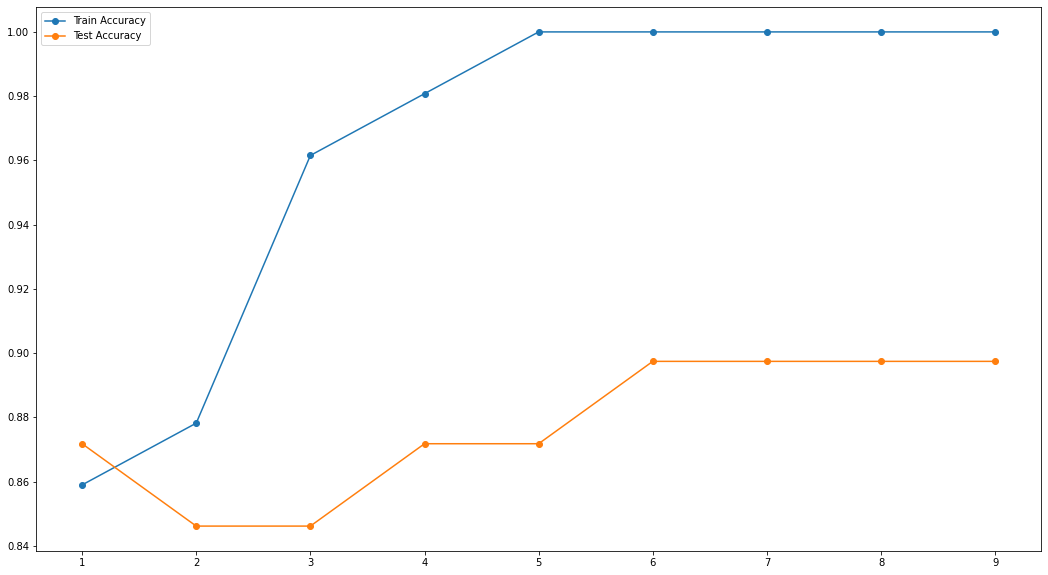

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 10)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
#  best fit depth=6, train: 1.000, test: 0.897

In [ ]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6)

In [ ]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=667)

Text(0.5, 0, 'Relative Importance')

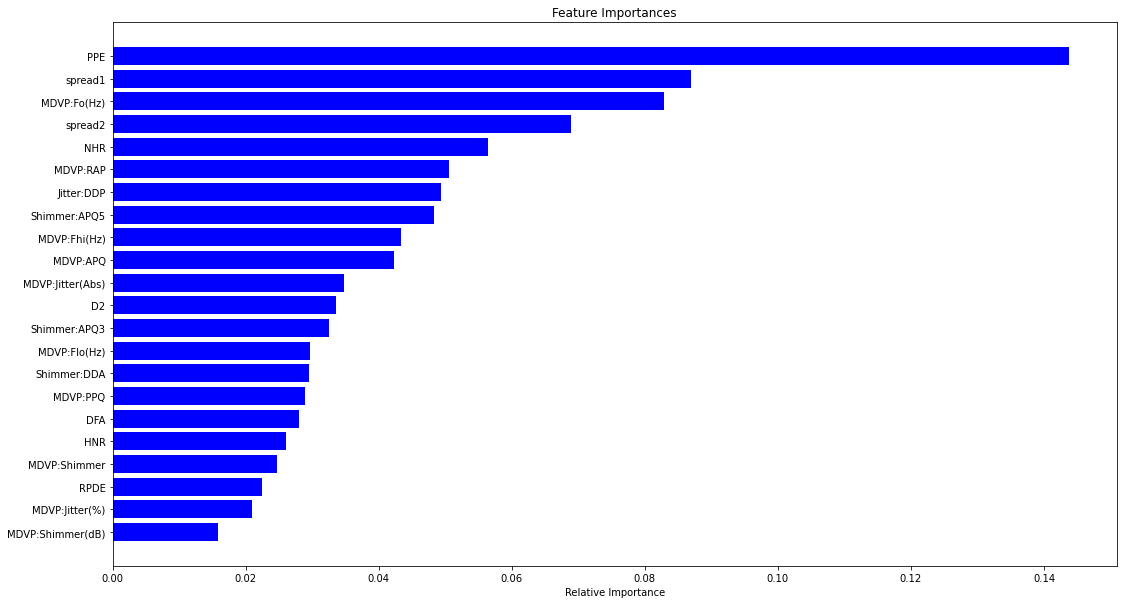

In [ ]:
#Feature importance for Random Forest
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8205128205128205

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8974358974358975

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.8974358974358975

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.8717948717948718

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.5641025641025641

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

0.8205128205128205

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

0.8974358974358975

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.8717948717948718

In [ ]:
labels = ['Healty', 'PD']

In [ ]:
classifiers = [DecisionTreeClassifier(max_depth=2), 
               RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

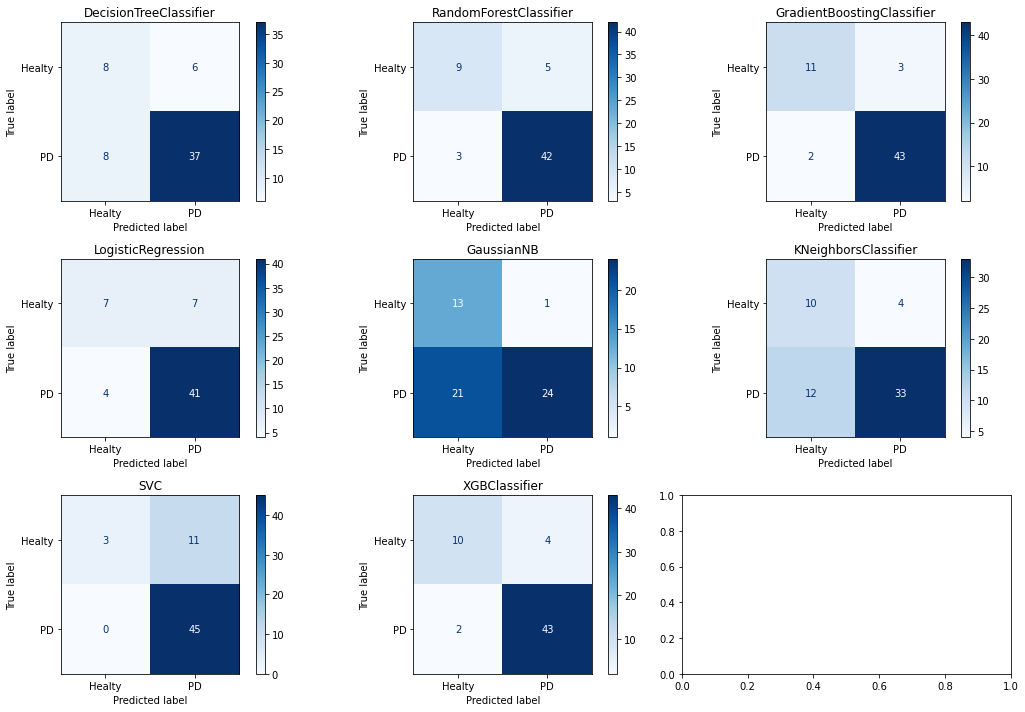

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=labels)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [ ]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        14
           1       0.86      0.82      0.84        45

    accuracy                           0.76        59
   macro avg       0.68      0.70      0.69        59
weighted avg       0.77      0.76      0.77        59

RandomForestClassifier(max_depth=6, random_state=667)
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.89      0.93      0.91        45

    accuracy                           0.86        59
   macro avg       0.82      0.79      0.80        59
weighted avg       0.86      0.86      0.86        59

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.93      0.96      0.95        45

    accuracy                           0.92        59
   macro 

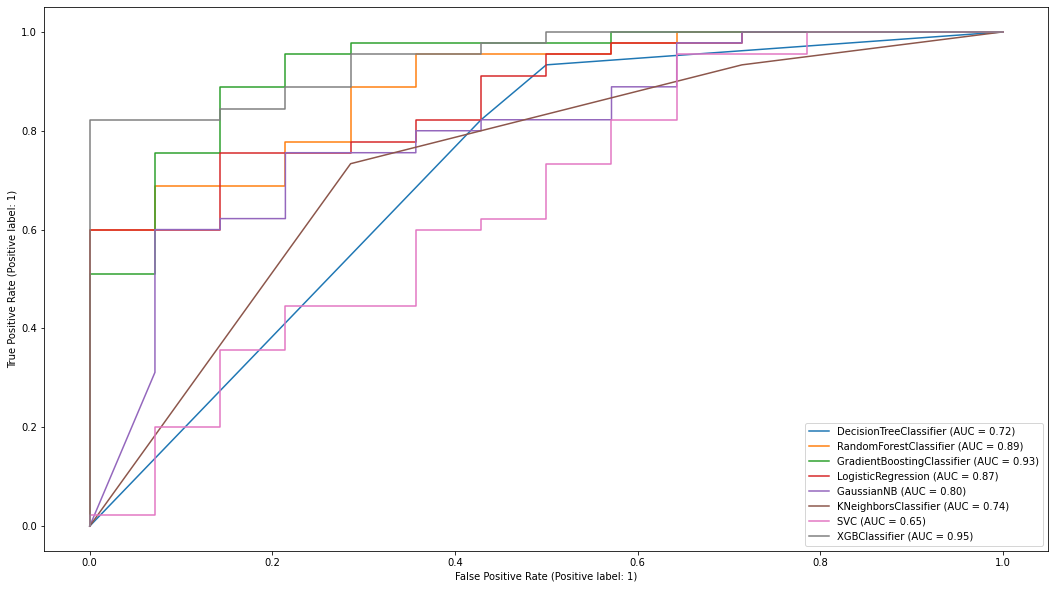

In [ ]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in classifiers:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

In [ ]:
!pip install plot-metric --quiet

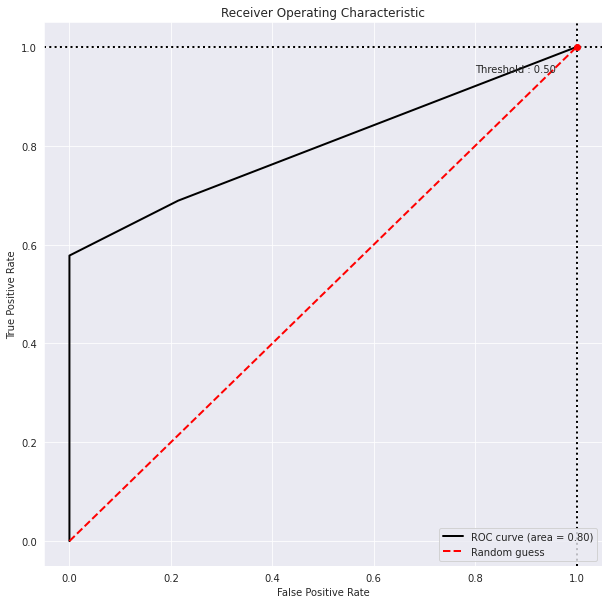

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.7992063492063491

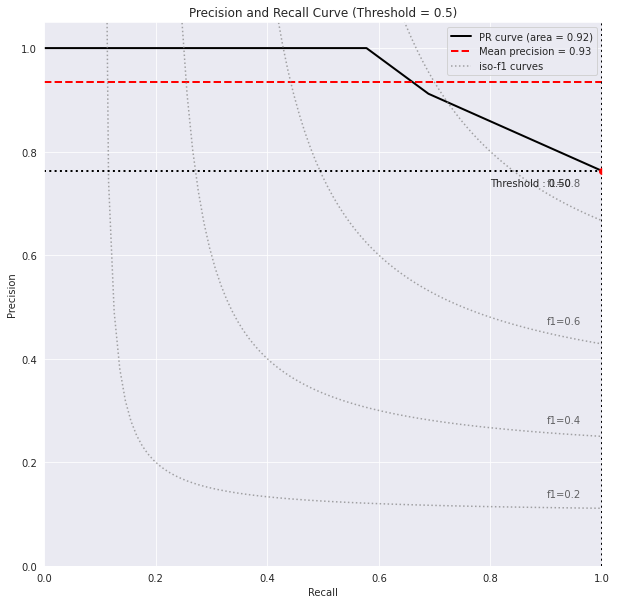

In [ ]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

featu=[]
for i in range(2,len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))


feature selected 2, Acc.Test: 0.831, AUC: 0.824
feature selected 3, Acc.Test: 0.831, AUC: 0.849
feature selected 4, Acc.Test: 0.864, AUC: 0.870
feature selected 5, Acc.Test: 0.847, AUC: 0.853
feature selected 6, Acc.Test: 0.814, AUC: 0.837
feature selected 7, Acc.Test: 0.864, AUC: 0.835
feature selected 8, Acc.Test: 0.831, AUC: 0.879
feature selected 9, Acc.Test: 0.814, AUC: 0.886
feature selected 10, Acc.Test: 0.814, AUC: 0.905
feature selected 11, Acc.Test: 0.847, AUC: 0.845
feature selected 12, Acc.Test: 0.797, AUC: 0.881
feature selected 13, Acc.Test: 0.864, AUC: 0.876
feature selected 14, Acc.Test: 0.847, AUC: 0.868
feature selected 15, Acc.Test: 0.814, AUC: 0.844
feature selected 16, Acc.Test: 0.847, AUC: 0.857
feature selected 17, Acc.Test: 0.847, AUC: 0.884
feature selected 18, Acc.Test: 0.847, AUC: 0.862
feature selected 19, Acc.Test: 0.864, AUC: 0.903
feature selected 20, Acc.Test: 0.847, AUC: 0.879
feature selected 21, Acc.Test: 0.864, AUC: 0.892

 Best number of feature sel

In [ ]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=667
                                                    )

In [ ]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=6)

pipe = Pipeline([
                ('scaler', standardize),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=10)),
                ('classifier',
                 RandomForestClassifier(max_depth=6, random_state=667))])

In [ ]:
input_data = [50,	1,	3,	145,	233,	1	,0,	150,	2.3,0,	0,	1	,1]

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('Healty')
else:
  print('PD')

In [ ]:
import joblib
joblib.dump(pipe,'pipe_loan.pkl')

In [ ]:
import joblib
joblib.dump(pipe,'pipe_loan.pkl')